## Part 1: Preprocessing

In [154]:
# Import our dependencies
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [155]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [156]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition', 'Department']].copy()
y_df.head()


,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


In [157]:
# Create a list of at least 10 column names to use as X data
selected_columns = ['Education', 'Age', 'DistanceFromHome', 'JobSatisfaction', 'OverTime', 'StockOptionLevel',
                    'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'NumCompaniesWorked']


# Create X_df using your selected columns
X_df = attrition_df[selected_columns]

# Show the data types for X_df
X_df.dtypes

Education                   int64
Age                         int64
DistanceFromHome            int64
JobSatisfaction             int64
OverTime                   object
StockOptionLevel            int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
NumCompaniesWorked          int64
dtype: object

In [158]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


In [159]:

# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary #
X_train['OverTime'] = X_train['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
X_test['OverTime'] = X_test['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)


# Identify categorical columns in X_train
categorical_columns = X_train.select_dtypes(include=['object']).columns


# Apply one-hot encoding to categorical columns (if any)
X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)


# Ensure that both training and testing data have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [160]:
# Create a StandardScaler #
scaler = StandardScaler()


# Fit the StandardScaler to the training data
scaler.fit(X_train)


# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [161]:
# Create a OneHotEncoder for the Department column
dept_encoder = OneHotEncoder(sparse_output=False)


# Fit the encoder to the training data
dept_encoder.fit(y_df[['Department']])


# Create two new variables by applying the encoder to the training and testing data
dept_train_encoded = dept_encoder.transform(y_df.loc[X_train.index, ['Department']])
dept_test_encoded = dept_encoder.transform(y_df.loc[X_test.index, ['Department']])

# Display the encoded department arrays
print(dept_train_encoded[:5])
print(dept_test_encoded[:5])
# Convert the encoded arrays to DataFrames with appropriate column names
dept_train_encoded_df = pd.DataFrame(dept_train_encoded, columns=dept_encoder.get_feature_names_out(['Department']))
dept_test_encoded_df = pd.DataFrame(dept_test_encoded, columns=dept_encoder.get_feature_names_out(['Department']))


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [162]:
# Create a OneHotEncoder for the Attrition column
attrition_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
attrition_encoder.fit(y_df[['Attrition']])


# Create two new variables by applying the encoder
# to the training and testing data
attrition_train_encoded = attrition_encoder.transform(y_df.loc[X_train.index, ['Attrition']])
attrition_test_encoded = attrition_encoder.transform(y_df.loc[X_test.index, ['Attrition']])


# Convert the encoded arrays to DataFrames with appropriate column names
dept_train_encoded_df = pd.DataFrame(dept_train_encoded, columns=dept_encoder.get_feature_names_out(['Department']))
dept_test_encoded_df = pd.DataFrame(dept_test_encoded, columns=dept_encoder.get_feature_names_out(['Department']))


# Create a OneHotEncoder for the Attrition column
attrition_encoder = OneHotEncoder(sparse_output=False)


# Fit the encoder to the training data
attrition_encoder.fit(y_df[['Attrition']])


# Create two new variables by applying the encoder to the training and testing data
attrition_train_encoded = attrition_encoder.transform(y_df.loc[X_train.index, ['Attrition']])
attrition_test_encoded = attrition_encoder.transform(y_df.loc[X_test.index, ['Attrition']])

# Display the encoded attrition arrays
print(attrition_train_encoded[:5])
print(attrition_test_encoded[:5])

# Convert the encoded arrays to DataFrames with appropriate column names
attrition_train_encoded_df = pd.DataFrame(attrition_train_encoded, columns=attrition_encoder.get_feature_names_out(['Attrition']))
attrition_test_encoded_df = pd.DataFrame(attrition_test_encoded, columns=attrition_encoder.get_feature_names_out(['Attrition']))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


## Create, Compile, and Train the Model

In [163]:

# Find the number of columns in the X training data
input_dim = X_train_scaled.shape[1]


# Create the input layer
input_layer = layers.Input(shape=(input_dim,), name='input')


# Create at least two shared layers
shared_layer1 = layers.Dense(64, activation='relu', name='shared1')(input_layer)
shared_layer2 = layers.Dense(128, activation='relu', name='shared2')(shared_layer1)


In [164]:

# Create a branch for Department with a hidden layer and an output layer
department_hidden = layers.Dense(32, activation='relu', name='department_hidden')(shared_layer2)
department_output = layers.Dense(3, activation='softmax', name='department_output')(department_hidden)




In [165]:

# Create a branch for Attrition with a hidden layer and an output layer
attrition_hidden = layers.Dense(32, activation='relu', name='attrition_hidden')(shared_layer2)
attrition_output = layers.Dense(2, activation='softmax', name='attrition_output')(attrition_hidden)

In [166]:

# Create the model
model = Model(inputs=input_layer, outputs=[department_output, attrition_output])


# Compile the model
model.compile(optimizer='adam', loss=['categorical_crossentropy', 'categorical_crossentropy'], metrics=['accuracy'])


# Summarize the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 shared1 (Dense)             (None, 64)                   704       ['input[0][0]']               
                                                                                                  
 shared2 (Dense)             (None, 128)                  8320      ['shared1[0][0]']             
                                                                                                  
 department_hidden (Dense)   (None, 32)                   4128      ['shared2[0][0]']             
                                                                                            

In [168]:
# Train the model
history = model.fit(X_train_scaled, [dept_train_encoded_df, attrition_train_encoded_df], epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0312 - department_output_loss: 0.0236 - attrition_output_loss: 0.0076 - department_output_accuracy: 0.9979 - attrition_output_accuracy: 0.9979 - val_loss: 4.2591 - val_department_output_loss: 2.9289 - val_attrition_output_loss: 1.3302 - val_department_output_accuracy: 0.5424 - val_attrition_output_accuracy: 0.7924
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0353 - department_output_loss: 0.0256 - attrition_output_loss: 0.0097 - department_output_accuracy: 1.0000 - attrition_output_accuracy: 0.9989 - val_loss: 4.3570 - val_department_output_loss: 2.9422 - val_attrition_output_loss: 1.4149 - val_department_output_accuracy: 0.5551 - val_attrition_output_accuracy: 0.7924
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0472 - department_output_loss: 0.0223 - attrition_output_loss: 0.0250 - department_output_accuracy: 0.9989 - attrition_output_accuracy: 0.9926 

In [172]:
# Evaluate the model with the testing data
evaluation = model.evaluate(X_test_scaled, [dept_test_encoded_df, attrition_test_encoded_df])

10/10 [==============================] - 0s 2ms/step - loss: 6.1438 - department_output_loss: 4.1090 - attrition_output_loss: 2.0348 - department_output_accuracy: 0.5340 - attrition_output_accuracy: 0.7891


Department predictions accuracy: 0.5340136289596558
Attrition predictions accuracy: 0.7891156673431396


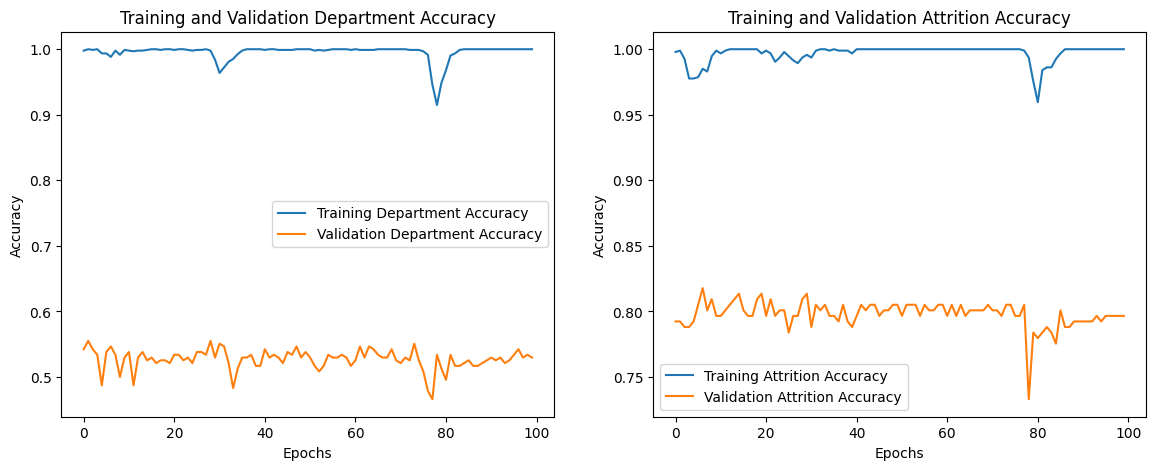

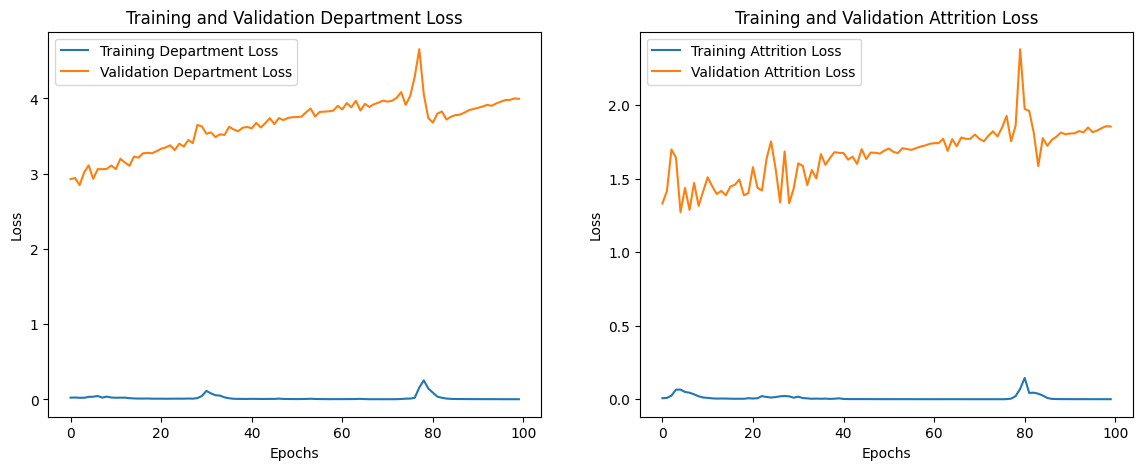

In [173]:
# Print the accuracy for both department and attrition
print(f"Department predictions accuracy: {evaluation[3]}")
print(f"Attrition predictions accuracy: {evaluation[4]}")

##################################################################

# I am adding Plotting Learning Curves: The learning curves for training and validation accuracy/loss will help visualize the model's performance and diagnose issues like overfitting or underfitting"

# Plotting Learning Curves: The learning curves for training and validation accuracy/loss will help visualize the model's performance and diagnose issues like overfitting or underfitting.
# Extract the metrics from the history object
dept_acc = history.history['department_output_accuracy']  # <- CHANGE HERE
val_dept_acc = history.history['val_department_output_accuracy']  # <- CHANGE HERE
attr_acc = history.history['attrition_output_accuracy']  # <- CHANGE HERE
val_attr_acc = history.history['val_attrition_output_accuracy']  # <- CHANGE HERE
dept_loss = history.history['department_output_loss']  # <- CHANGE HERE
val_dept_loss = history.history['val_department_output_loss']  # <- CHANGE HERE
attr_loss = history.history['attrition_output_loss']  # <- CHANGE HERE
val_attr_loss = history.history['val_attrition_output_loss']  # <- CHANGE HERE

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy for department
axes[0].plot(dept_acc, label='Training Department Accuracy')
axes[0].plot(val_dept_acc, label='Validation Department Accuracy')
axes[0].set_title('Training and Validation Department Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot accuracy for attrition
axes[1].plot(attr_acc, label='Training Attrition Accuracy')
axes[1].plot(val_attr_acc, label='Validation Attrition Accuracy')
axes[1].set_title('Training and Validation Attrition Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

# Create subplots for loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss for department
axes[0].plot(dept_loss, label='Training Department Loss')
axes[0].plot(val_dept_loss, label='Validation Department Loss')
axes[0].set_title('Training and Validation Department Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot loss for attrition
axes[1].plot(attr_loss, label='Training Attrition Loss')
axes[1].plot(val_attr_loss, label='Validation Attrition Loss')
axes[1].set_title('Training and Validation Attrition Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.show()

# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1. Accuracy is a common metric, but it might not be the best choice for this dataset. If the dataset has imbalanced classes (e.g., significantly more 'No' than 'Yes' in Attrition), accuracy could be misleading as the model might achieve high accuracy by simply predicting the majority class. In the context of employee attrition, false negatives (predicting an employee will stay when they will actually leave) might be more costly than false positives. Therefore, metrics like Precision, Recall, or F1-Score might provide more meaningful insights.
2. For the output layers, I used:

softmax for the Department output layer: This is because Department classification is a multi-class problem with three possible classes, and softmax provides a probability distribution across the classes, summing to 1.
softmax for the Attrition output layer: Although Attrition is a binary classification problem, I used softmax with two output nodes to provide a probability distribution. This maintains consistency with the Department output layer. sigmoid could also be used here, but softmax was chosen for uniformity.
3. To improve the model’s performance, I can:

Handle Class Imbalance: If the classes are imbalanced, I can use techniques such as oversampling the minority class, undersampling the majority class, or applying class weights during training.
Feature Engineering: Adding new features or transforming existing ones to better capture underlying patterns in the data can enhance model performance.
Hyperparameter Tuning: Techniques like Grid Search or Random Search can help find the optimal hyperparameters for the model.
Regularization: Adding L1 or L2 regularization can help prevent overfitting.
Advanced Models: Experimenting with more complex models like ensemble methods (e.g., Random Forest, Gradient Boosting) or more advanced neural network architectures might yield better results.
Cross-Validation: Using cross-validation can ensure the model generalizes well to unseen data.